<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab 5

## Introduction:

The concept of mutual information is powerful in theory, but in practice it can be difficult to estimate. In this lab, you will implement a conceptually simple way to estimate the mutual information between two random variables. It is known as the KSG estimator (from "Kraskov–Stögbauer–Grassberger").

You will then use your estimator as part of a feature selection algorithm.

---
## Grading standards   

Your notebook will be graded on the following:

* 60% Correct implementation of KSG estimator
* 20% Correct implementation of "all_mutual_inf"
* 20% Correct selection of most informative columns

---
## Description

For this lab, we will use [student performance data from Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression), which can also be [downloaded from the class website](https://wingated.github.io/cs473/data/student_performance.csv).

Begin by loading and preparing the dataset:

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv( "student_performance.csv" )

df.loc[ df['Extracurricular Activities'] == 'Yes', 'Extracurricular Activities' ] = 1
df.loc[ df['Extracurricular Activities'] == 'No', 'Extracurricular Activities' ] = 0

X = df[['Hours Studied','Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Let's add some noisy data that's not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

X = np.hstack( (X,E) )


The KSG estimator is an elegant idea that's fairly easy to implement. The idea is to use an adaptive grid, where the grid depends on the local density of the data.  This is accomplished by calculating the k'th nearest neighbor for each point, and then defining a box around each point that just barely extends to include the k'th nearest neighbor. Importantly, the size of the box is also used in the marginal entropy calculations 

To get some intuition for the method, check out [this demonstration on Wolfram Alpha's site](https://demonstrations.wolfram.com/KraskovKSGEstimatorOfMutualInformation/).  Here is a screenshot of their UI:

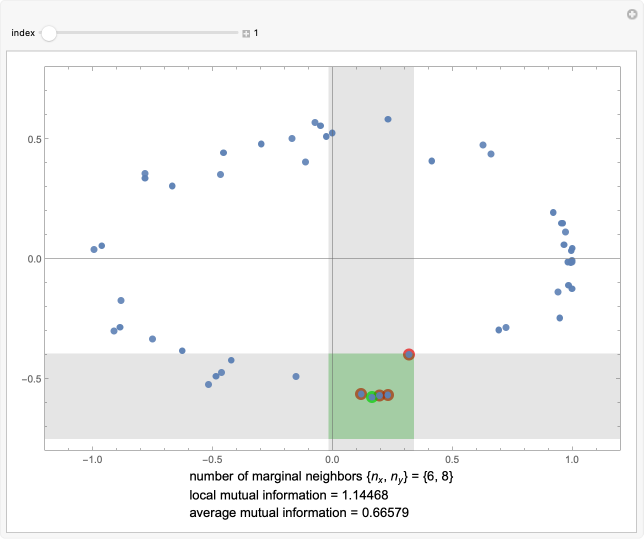

The algorithm is fairly straightforward.  We are given N samples from the joint distribution of p(X,Y). First, we calculate the *local mutual information* for each data point:

1. For each datapoint d_j = (x_j,y_j)
2. Find the k'th nearest neighbor (call this point n_j) -- you should use a regular Euclidean distance, and distance should be calculated using both coordinates (ie, don't just calculate distances using only the x or y coordinate)
3. Compute the x-distance and the y-distance between d_j and n_j
4. Count the number of points that fall within the x-distance of d_j (ie, ignore y); call this number n_x_j.  Do the same for the y-distance (these are the shaded gray boxes in the image); call it n_y_j.
5. Calculate the local mutual information using the following equation:

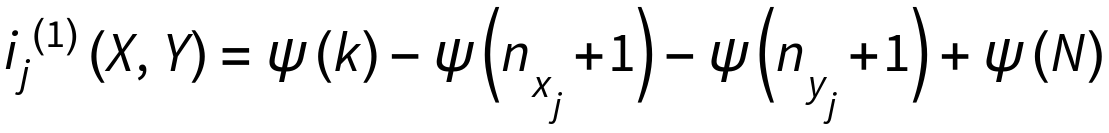

where \Phi is the digamma function

Then, we calculate the final mutual information by averaging over all of the datapoints and adding a few more digamma calls:

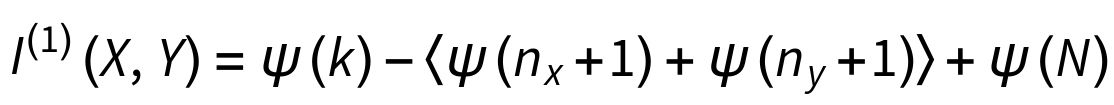

In [ ]:
def mutual_inf( X, Y, k ):
    # X and Y are lists of length n of samples from p(X,Y)
    # 
    # this function returns a single scalar
    
    # your code here
    pass

---
## Part 2:

Now that you can estimate mutual information between two variables, we're going to use your method in the context of a regression problem. 

Given our X,y data from the beginning of the lab, run your function and calculate the mutual information between every column of X and y.  This should result in a list of scores, that might look something like this:

```python
array([0.14482715, 0.94112489, 0.00992576, 0.01337369, 0.00845679,
       0.        , 0.        , 0.00618255, 0.00606154, 0.00581084,
       0.        , 0.        , 0.01455877, 0.        , 0.        ,
       0.        , 0.00174498, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00474587, 0.01159982, 0.        ])
```

If you wrap this in a single function (call it "all_mutual_inf"), then you can use scikit learn's feature selection algorithms:

In [ ]:
def all_mutual_inf( X, y ):
    # return a list of mutual informations
    # the list should be as long as the number of columns in X

    # your code here
    pass

In [ ]:
from sklearn.feature_selection import SelectKBest

X_new = SelectKBest( all_mutual_inf, k=2 ).fit_transform(X, y)

So: which X features are most informative about y?

---
## Hints

The following functions may be useful to you:

In [ ]:
scipy.special.digamma

For fun, you could also [read more about the KSG estimator](https://arxiv.org/pdf/1604.03006).